# Week 10

This week we want to build on our results from previous weeks

In [1]:
from modules import week8 as w8
from modules import week5 as w5
from modules import week9 as w9
from modules import misc
import xarray as xr
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
# Loading data from file
SIC, LIC = w8.load_ice_data()
SIC = SIC.sel(time=slice('1979-01-01','2019-12-31')).compute()
LIC = LIC.sel(time=slice('1979-01-01','2019-12-31')).compute()
temperature = w8.load_temp_data().sel(time=slice('1979-01-01','2019-12-31')).compute()

# Landmask
landmask = w8.load_landmask()
landmask = landmask >= .5

# Preprocessing
SIC = (SIC.pipe(w5.yearly_average)).copy()
LIC = (LIC.pipe(w5.yearly_average)).copy()
temperature = (temperature.pipe(w5.yearly_average)).copy()
SIC_anomalous = (SIC.pipe(w5.find_anomalies)).copy()
LIC_anomalous = (LIC.pipe(w5.find_anomalies)).copy()
temperature_anomalous = (temperature.pipe(w5.find_anomalies)).copy()

# Breaking up temporally
SIC_short = SIC_anomalous.sel(time=slice('2002-01-01', '2019-12-31')).copy()
LIC_short = LIC_anomalous.sel(time=slice('2002-01-01', '2019-12-31')).copy()
temperature_short = temperature_anomalous.sel(time=slice('2002-01-01', '2019-12-31')).skt.copy()
SIC_long = SIC_anomalous.sel(time=slice('1979-01-01', '2019-12-31')).copy()
temperature_long = temperature_anomalous.sel(time=slice('1979-01-01', '2019-12-31')).skt.copy()

misc.print_heading("Preprocessing Done")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:04<00:00, 43.17it/s]


------------------------------------------------------------------------------
                             Preprocessing Done                              
------------------------------------------------------------------------------


In [3]:
# Calculations
sic_temp_long, sic_temp_short, lic_temp_short = w8.regressions(SIC_anomalous, LIC_anomalous, temperature_anomalous, landmask)

Finding coefficients for ['skt'] against sic


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:06<00:00, 15736.80it/s]


Predicting SIC
Finding coefficients for ['skt'] against sic


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:06<00:00, 15170.14it/s]


Predicting SIC
Finding coefficients for ['skt'] against sic


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:03<00:00, 29489.58it/s]


Predicting SIC


In [4]:
sic_temp_long

<xarray.Dataset>
Dimensions:          (time: 41, x: 316, y: 332)
Coordinates:
  * time             (time) datetime64[ns] 1979-01-01 1980-01-01 ... 2019-01-01
  * y                (y) int32 4350000 4325000 4300000 ... -3900000 -3925000
  * x                (x) int32 -3950000 -3925000 -3900000 ... 3900000 3925000
    month            int64 1
Data variables:
    sic              (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    skt              (x, y, time) float64 0.0 0.0 0.0 ... 0.3653 0.2988 -0.4652
    prediction_skt   (x, y, time) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    regr_coef_skt    (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    regr_coef_error  (x, y) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

findfont: Font family ['computer modern'] not found. Falling back to DejaVu Sans.


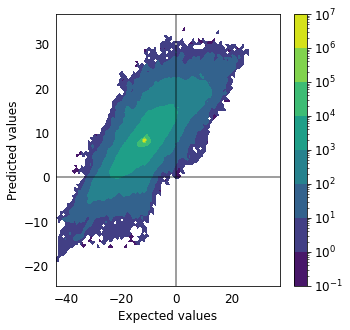

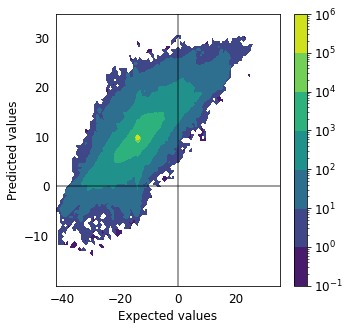

In [5]:
w8.regression_plots(sic_temp_long.where(~landmask),  SIC_long.where(~landmask),  temperature_long.where(~landmask))
w8.regression_plots(sic_temp_short.where(~landmask), SIC_short.where(~landmask), temperature_short.where(~landmask))
# w8.regression_plots(lic_temp_short.where(landmask), LIC_short.where(landmask), temperature_short.where(landmask))

# Remote regressions

We want to select the region around the Antarctic Peninsular. For now we will just select the locations with the 5th percentile largest decreases. We also select the points only in that quadrent.

In [6]:
from modules import week10 as w10
from modules import week9  as w9
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm, LogNorm
import numpy as np
import scipy
import cartopy.crs as ccrs

In [7]:
LIC_short

<xarray.DataArray 'lic' (time: 18, y: 332, x: 316)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time     (time) datetime64[ns] 2002-01-01 2003-01-01 ... 2019-01-01
  * y        (y) int32 4350000 4325000 4300000 ... -3875000 -3900000 -3925000
  * x        (x) int32 -3950000 -3925000 -3900000 ... 3875000 3900000 3925000
    month    int64 1

In [8]:
LIC_mean = LIC.mean(dim='time').copy()
LIC_mean = LIC_mean.where(landmask)

findfont: Font family ['computer modern'] not found. Falling back to DejaVu Sans.


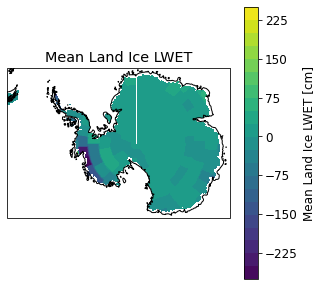

In [9]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plot = ax.contourf(LIC_mean.x, LIC_mean.y, LIC_mean,
                   levels=20, crs=ccrs.SouthPolarStereo())
ax.coastlines()
ax.set_title('Mean Land Ice LWET')
cbar = plt.colorbar(plot)
cbar.set_label(r'Mean Land Ice LWET [cm]')
misc.savefigures(folder='images/week10', filename='mean_lic_distribution')
plt.show()

In [10]:
mask2 = LIC_mean<np.nanpercentile(LIC_mean, 5)
mask2 *= LIC_mean.x <0
np.nanpercentile(LIC_mean, 5)

-63.40217883476104

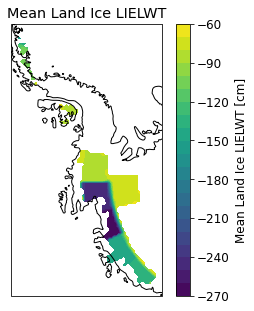

In [11]:
LIC_mean2 = LIC_mean.where(mask2)
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())
plot = ax.contourf(LIC_mean2.x, LIC_mean2.y, LIC_mean2,
                   levels=20, crs=ccrs.SouthPolarStereo())
ax.coastlines()
ax.set_title('Mean Land Ice LIELWT')
cbar = plt.colorbar(plot)
cbar.set_label(r'Mean Land Ice LIELWT [cm]')
misc.savefigures(folder='images/week10', filename='decreasing_mean_lic_distribution')
plt.show()

In [12]:
LIC_peninsular_decrease = LIC.where(mask2)

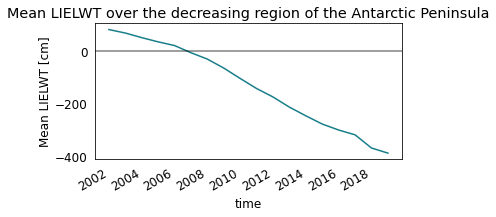

In [13]:
LIC_peninsular_decrease_timeseries = LIC_peninsular_decrease.mean(dim=('x','y'))
LIC_peninsular_decrease_timeseries.plot()
plt.title('Mean LIELWT over the decreasing region of the Antarctic Peninsula')
plt.ylabel('Mean LIELWT [cm]')
plt.axhline(0,color='k', alpha = 0.5)
misc.savefigures(folder='images/week10', filename='decreasing_mean_lic_timeseries')
plt.show()

In [14]:
dependant = LIC_peninsular_decrease_timeseries
independant = temperature.sel(time=slice('2002-01-01', '2019-12-31')).skt.copy()
dependant, independant = xr.broadcast(dependant, independant)
ds = xr.Dataset(dict(dependant=dependant, independant=independant))
ds

<xarray.Dataset>
Dimensions:      (time: 18, x: 316, y: 332)
Coordinates:
  * time         (time) datetime64[ns] 2002-01-01 2003-01-01 ... 2019-01-01
  * y            (y) int32 4350000 4325000 4300000 ... -3900000 -3925000
  * x            (x) int32 -3950000 -3925000 -3900000 ... 3900000 3925000
Data variables:
    dependant    (time, y, x) float64 80.92 80.92 80.92 ... -389.6 -389.6 -389.6
    independant  (time, y, x) float64 0.0 0.0 0.0 0.0 ... 285.1 285.2 285.2

In [15]:
regression_results = w5.multiple_fast_regression(ds, 'dependant', ['independant'])
regression_results

Finding coefficients for ['independant'] against dependant


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 104912/104912 [00:06<00:00, 16067.55it/s]


Predicting SIC


<xarray.Dataset>
Dimensions:                 (time: 18, x: 316, y: 332)
Coordinates:
  * time                    (time) datetime64[ns] 2002-01-01 ... 2019-01-01
  * y                       (y) int32 4350000 4325000 ... -3900000 -3925000
  * x                       (x) int32 -3950000 -3925000 ... 3900000 3925000
Data variables:
    dependant               (x, y, time) float64 80.92 67.76 ... -370.1 -389.6
    independant             (x, y, time) float64 0.0 0.0 0.0 ... 286.0 285.2
    prediction_independant  (x, y, time) float64 0.0 0.0 ... -1.545e+04
    regr_coef_independant   (x, y) float64 0.0 0.0 0.0 ... -30.77 -39.93 -54.18
    regr_coef_error         (x, y) float64 -133.2 -133.2 ... 1.127e+04 1.535e+04

In [16]:
out = w9.fast_single_regression(dependant, independant)

Running regression for lic from skt
Regression finished


In [17]:
out

<xarray.Dataset>
Dimensions:      (time: 18, x: 316, y: 332)
Coordinates:
  * time         (time) datetime64[ns] 2002-01-01 2003-01-01 ... 2019-01-01
  * y            (y) int32 4350000 4325000 4300000 ... -3900000 -3925000
  * x            (x) int32 -3950000 -3925000 -3900000 ... 3900000 3925000
Data variables:
    dependant    (time, y, x) float64 80.92 80.92 80.92 ... -389.6 -389.6 -389.6
    indepenant   (time, y, x) float64 0.0 0.0 0.0 0.0 ... 285.1 285.2 285.2
    regression   (y, x) float64 nan nan nan nan ... -86.35 -81.71 -72.08 -54.18
    pvalues      (y, x) float64 1.0 1.0 1.0 1.0 ... 0.6193 0.6242 0.6534 0.7329
    correlation  (y, x) float64 0.0 0.0 0.0 0.0 ... -0.1239 -0.1137 -0.08651
    intercept    (y, x) float64 nan nan nan nan ... 2.32e+04 2.046e+04 1.535e+04
    prediction   (y, x, time) float64 nan nan nan nan ... -149.7 -146.1 -104.7

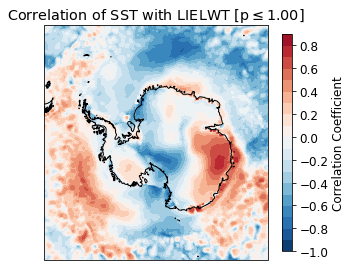

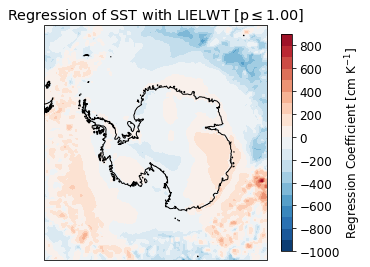

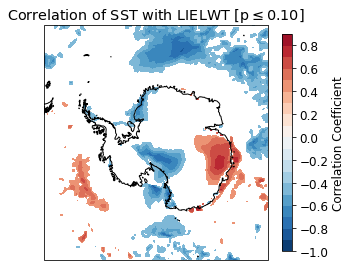

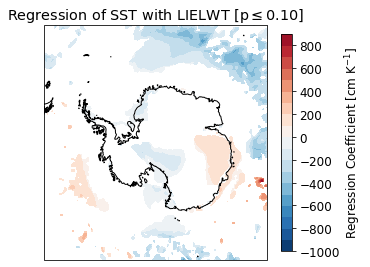

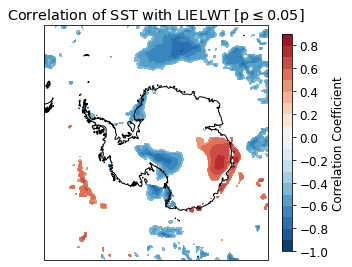

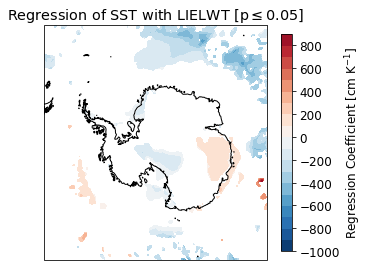

In [18]:
sig_threshold = 0.1
for sig_threshold in [1, 0.1, 0.05]:
    regression_results_sig = out.where(out.pvalues<=sig_threshold)

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

    divnorm = TwoSlopeNorm(vmin=-1, vcenter=0, vmax=1)

    plot = ax.contourf(regression_results_sig.x, regression_results_sig.y, regression_results_sig.correlation,
                       levels=20, crs=ccrs.SouthPolarStereo(), norm = divnorm, cmap = 'RdBu_r')
    ax.coastlines()
    ax.set_title(f'Correlation of SST with LIELWT [p$\leq${sig_threshold:.2f}]')
    cbar = plt.colorbar(plot, shrink=0.8)
    cbar.set_label(r'Correlation Coefficient')
    misc.savefigures(folder='images/week10', filename=f'correlations_{sig_threshold}')
    plt.show()

    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.SouthPolarStereo())

    vmin, vmax = (-1000,1000)
    divnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)

    plot = ax.contourf(regression_results_sig.x, regression_results_sig.y, regression_results_sig.regression,
                       levels=np.arange(vmin,vmax,100), crs=ccrs.SouthPolarStereo(), norm = divnorm, cmap = 'RdBu_r')
    ax.coastlines()
    ax.set_title(f'Regression of SST with LIELWT [p$\leq${sig_threshold:.2f}]')
    cbar = plt.colorbar(plot, shrink=0.8)
    cbar.set_label(r'Regression Coefficient [cm K$^{-1}$]')
    misc.savefigures(folder='images/week10', filename=f'regressions_{sig_threshold}')
    plt.show()

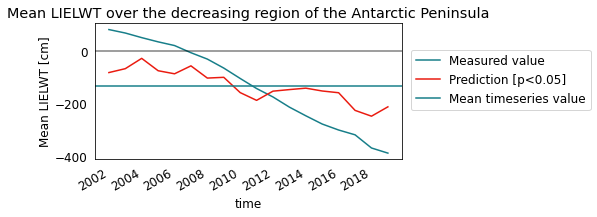

In [19]:
sig = 0.05
LIC_peninsular_decrease_timeseries = LIC_peninsular_decrease.mean(dim=('x','y'))
LIC_peninsular_decrease_timeseries.plot(label='Measured value')
out.prediction.where(out.pvalues<=sig).mean(dim=('x','y')).plot(label=f'Prediction [p<{sig:.2f}]')
plt.title('Mean LIELWT over the decreasing region of the Antarctic Peninsula')
plt.ylabel('Mean LIELWT [cm]')
plt.axhline(LIC_peninsular_decrease_timeseries.mean(), label ='Mean timeseries value')
plt.legend(bbox_to_anchor=(1.01, 0.85), ncol=1, loc='upper left')
plt.axhline(0,color='k', alpha = 0.5)
misc.savefigures(folder='images/week10', filename='decreasing_mean_lic_timeseries_with_prediction')
plt.show()

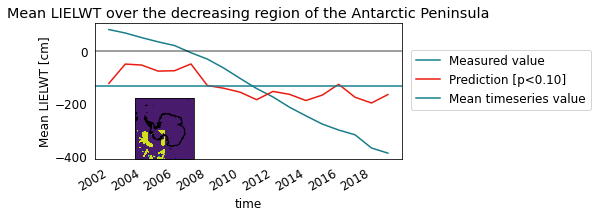

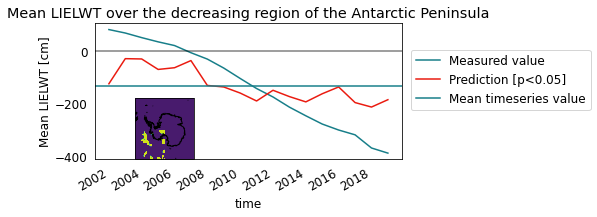

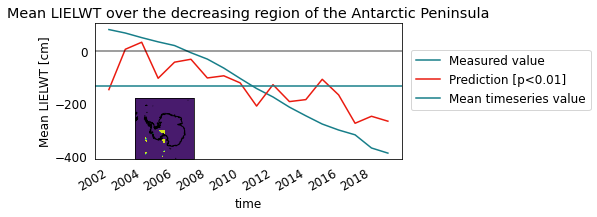

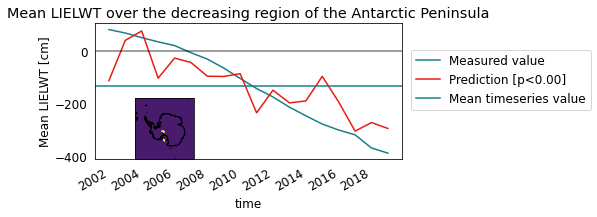

In [20]:
sig = 0.05

for sig in [0.1,0.05,0.01,0.001]:
    mask3 = out.pvalues<=sig
    mask3 *= out.x <0
    mask3 *= out.y <0
#     mask3 *= out.regression<0


    LIC_peninsular_decrease_timeseries = LIC_peninsular_decrease.mean(dim=('x','y'))
    LIC_peninsular_decrease_timeseries.plot(label='Measured value')
    out.prediction.where(mask3).mean(dim=('x','y')).plot(label=f'Prediction [p<{sig:.2f}]')
    plt.title('Mean LIELWT over the decreasing region of the Antarctic Peninsula')
    plt.ylabel('Mean LIELWT [cm]')
    plt.axhline(LIC_peninsular_decrease_timeseries.mean(), label ='Mean timeseries value')
    plt.legend(bbox_to_anchor=(1.01, 0.85), ncol=1, loc='upper left')
    plt.axhline(0,color='k', alpha = 0.5)

    ax = plt.gcf().add_subplot(2, 2, 3, projection=ccrs.SouthPolarStereo()) 
    ax.contourf(mask3.x, mask3.y, mask3.values, transform = ccrs.SouthPolarStereo())
    ax.coastlines()

    misc.savefigures(folder='images/week10', filename=f'decreasing_mean_lic_timeseries_with_prediction_with_mask_{sig:.3f}')
    plt.show()